# Introduction

Personal Project by Arvin Assanny

### Description

We are using dataset from credit-card-information table which consist the data of credit card information, which we retrived using SQL query

```
SELECT *
FROM `ftds-hacktiv8-project.phase1_ftds_003_hck.credit-card-information`
WHERE mod(CUST_ID,2) = 1
```

After retrieve the filtered dataset, we save it on .csv file then proceed to load it, in this notebook later on.


### Problems
Buatlah model clustering untuk melakukan Customer Segmentation dari data kartu kredit sebuah bank dibawah ini. Data ini merupakan data informasi penggunaan kartu kredit selama 6 bulan terakhir.

### Conceptual Problems

1. Apakah yang dimaksud dengan inertia pada algoritma K-Means ?

    Inertia measures how well a dataset was clustered by K-Means. It is calculated by measuring the distance between each data point and its centroid, squaring this distance, and summing these squares across one cluster. The rules that must be fulfilled for a good KMeans model is one with low inertia and a low number of clusters ( K ).

    In other words, it is used to evaluate the quality of the clustering by comparing the sum of distances of all points in a cluster from their respective cluster centroid.

2. Jelaskan yang dimaksud dengan Elbow Method (alasan penggunaan, cara penggunaan, kelemahan/kelebihan, dll) !

    Elbow method is a technique used to determine the optimal number of clusters for a K-Means clustering algorithm. The method consists of plotting the explained variation as a function of the number of clusters and picking the elbow of the curve as the number of clusters to use. It is usually not enough to just run an elbow method because somehow can be subjective at the same time.

    it should be used in conjunction with other techniques and considerations, such as domain knowledge and the silhouette score, to ensure that the best number of clusters is chosen.

## Import Libraries

We will import libraries which we will use on completing this assignment

In [1]:
# Data Loading
import pandas as pd

#Importing Warning filtering
import warnings
warnings.filterwarnings('ignore')

# Data Viz
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns


# Data Preprocessing
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.impute import KNNImputer
from sklearn.preprocessing import QuantileTransformer
from sklearn.decomposition import PCA

from sklearn.neighbors import LocalOutlierFactor

# Feature Selection (manual)
import numpy as np

# Model Definition
from sklearn.cluster import KMeans

# Model Evaluation
from sklearn.metrics import silhouette_score, silhouette_samples, calinski_harabasz_score
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

# Model Inference
import joblib

## Data Loading

In [2]:
df = pd.read_csv('h8dsft_P1G4_Arvin_Assanny.csv')
df.head(10)

CUST_ID     BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0     3091    3.833185           0.125000      45.00             45.00   
1     5069    0.000000           0.000000     176.03            176.03   
2     6075  757.964752           0.875000     157.40            157.40   
3     6291  264.566591           0.375000    1150.00           1150.00   
4     7755  440.613643           1.000000     600.00            600.00   
5     8299  611.561026           1.000000     765.00            765.00   
6     8629    0.228572           0.125000      60.00             60.00   
7     8805  105.333584           0.375000     306.00            306.00   
8        7   16.379412           0.454545     178.15              0.00   
9       91  559.151424           1.000000      94.00             94.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    0.00           0.0                0.125   
1                    0.00           0.0                0.125   
2                    0.00           0.0                0.125   
3                    0.00           0.0                0.125   
4                    0.00           0.0                0.125   
5                    0.00           0.0                0.125   
6                    0.00           0.0                0.125   
7                    0.00           0.0                0.125   
8                  178.15           0.0                0.250   
9                    0.00           0.0                0.250   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                       0.125                              0.00   
1                       0.125                              0.00   
2                       0.125                              0.00   
3                       0.125                              0.00   
4                       0.125                              0.00   
5                       0.125                              0.00   
6                       0.125                              0.00   
7                       0.125                              0.00   
8                       0.000                              0.25   
9                       0.250                              0.00   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                     0.0                 0              1         500.0   
1                     0.0                 0              1        7000.0   
2                     0.0                 0              6        1200.0   
3                     0.0                 0              1        1200.0   
4                     0.0                 0              1        1000.0   
5                     0.0                 0              1        2000.0   
6                     0.0                 0              1        1500.0   
7                     0.0                 0              2        6000.0   
8                     0.0                 0              3        5000.0   
9                     0.0                 0              3        5500.0   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0     0.000000               NaN          0.000000       8  
1     0.000000               NaN          0.000000       8  
2  1494.480376       2638.598410          0.000000       8  
3  3029.380326         85.428885          0.000000       8  
4   215.316424        137.846006          0.000000       8  
5   204.464151        146.352314          0.000000       8  
6   438.738982               NaN          0.000000       8  
7   101.986927        118.324082          0.000000       8  
8   229.376368         89.613822          0.181818      12  
9   254.733329        218.279194          0.000000      12

In [3]:
df.tail(10)

CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
4465     6809  4438.521324           1.000000     591.84            109.16   
4466     7211  1135.703750           1.000000      92.07              0.00   
4467     8295   185.984965           0.454545     482.24            392.24   
4468     8855  3531.167073           0.900000     797.50            577.83   
4469     2389  1917.895730           1.000000     285.07            285.07   
4470     2345  9629.808851           1.000000       0.00              0.00   
4471     6785  1040.030221           1.000000       0.00              0.00   
4472     7347  1322.818587           1.000000       0.00              0.00   
4473     8447  1060.391273           1.000000       0.00              0.00   
4474     1995  3447.674222           1.000000     205.00            205.00   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
4465                  482.68    564.365429             0.636364   
4466                   92.07     81.509491             0.272727   
4467                   90.00    903.843591             0.272727   
4468                  219.67   5273.226918             0.700000   
4469                    0.00   6084.858872             0.363636   
4470                    0.00   4372.393835             0.000000   
4471                    0.00   1390.648290             0.000000   
4472                    0.00    762.301096             0.000000   
4473                    0.00   1475.858013             0.000000   
4474                    0.00   4548.057776             0.090909   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
4465                    0.181818                          0.454545   
4466                    0.000000                          0.181818   
4467                    0.181818                          0.090909   
4468                    0.400000                          0.500000   
4469                    0.363636                          0.000000   
4470                    0.000000                          0.000000   
4471                    0.000000                          0.000000   
4472                    0.000000                          0.000000   
4473                    0.000000                          0.000000   
4474                    0.090909                          0.000000   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
4465                0.272727                 3             11       17000.0   
4466                0.272727                 3              3        1200.0   
4467                0.272727                 8              8        1200.0   
4468                0.900000                33             21        4000.0   
4469                1.090909                28              6        3000.0   
4470                0.545455                 9              0       12000.0   
4471                0.545455                18              0        1400.0   
4472                0.545455                11              0        1500.0   
4473                0.545455                10              0        2000.0   
4474                0.545455                 7              1       10500.0   

         PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
4465  5552.601399       1094.486286              0.00      11  
4466   355.798199        434.689529              0.00      11  
4467  2333.997439        160.900585              0.25      11  
4468  2979.546700       3052.080103              0.00      10  
4469  5692.682993        556.449635              0.00      11  
4470  2468.988022       2134.295731              0.00      11  
4471   290.129620        287.994171              0.00      11  
4472  1035.627320        312.835530              0.00      11  
4473   407.360560        277.084736              0.00      11  
4474   665.239171        817.844662              0.00      11

Here we showed ten first and last row of our dataframe

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4475 entries, 0 to 4474
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           4475 non-null   int64  
 1   BALANCE                           4475 non-null   float64
 2   BALANCE_FREQUENCY                 4475 non-null   float64
 3   PURCHASES                         4475 non-null   float64
 4   ONEOFF_PURCHASES                  4475 non-null   float64
 5   INSTALLMENTS_PURCHASES            4475 non-null   float64
 6   CASH_ADVANCE                      4475 non-null   float64
 7   PURCHASES_FREQUENCY               4475 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        4475 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  4475 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            4475 non-null   float64
 11  CASH_ADVANCE_TRX                  4475 non-null   int64  
 12  PURCHA

Here we have some missing value in our data, we will look in more detail later on. Also we get information that our data are all numerical type.

In [5]:
df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          0
PAYMENTS                              0
MINIMUM_PAYMENTS                    155
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

Here we have 155 missing values in MINIMUM_PAYMENTS column, we might opt to impute this

In [6]:
df.duplicated().any()

False

We have duplicated data.

### Data Description

* Here we can see that CUST_ID has so many unique value, and we decided to drop it since the column didn't contain any important value
* Our data may be skewed and have many outliers on it, we will deal with that later.

In [7]:
df.describe().T

count         mean          std        min  \
CUST_ID                           4475.0  4475.000000  2583.931114   1.000000   
BALANCE                           4475.0  1563.205717  2072.045789   0.000000   
BALANCE_FREQUENCY                 4475.0     0.876933     0.238222   0.000000   
PURCHASES                         4475.0  1003.251343  2060.034730   0.000000   
ONEOFF_PURCHASES                  4475.0   596.369893  1653.425984   0.000000   
INSTALLMENTS_PURCHASES            4475.0   407.110215   880.799744   0.000000   
CASH_ADVANCE                      4475.0   984.288554  2060.448056   0.000000   
PURCHASES_FREQUENCY               4475.0     0.490579     0.402907   0.000000   
ONEOFF_PURCHASES_FREQUENCY        4475.0     0.202301     0.298203   0.000000   
PURCHASES_INSTALLMENTS_FREQUENCY  4475.0     0.363886     0.397603   0.000000   
CASH_ADVANCE_FREQUENCY            4475.0     0.136132     0.201036   0.000000   
CASH_ADVANCE_TRX                  4475.0     3.301229     7.134727   0.000000   
PURCHASES_TRX                     4475.0    14.929162    25.540814   0.000000   
CREDIT_LIMIT                      4475.0  4494.878630  3609.267706  50.000000   
PAYMENTS                          4475.0  1740.075430  2827.633858   0.000000   
MINIMUM_PAYMENTS                  4320.0   873.976757  2436.877272   0.019163   
PRC_FULL_PAYMENT                  4475.0     0.150224     0.289081   0.000000   
TENURE                            4475.0    11.518212     1.328925   6.000000   

                                          25%          50%          75%  \
CUST_ID                           2238.000000  4475.000000  6712.000000   
BALANCE                            124.432849   871.355430  2047.570799   
BALANCE_FREQUENCY                    0.888889     1.000000     1.000000   
PURCHASES                           39.560000   360.000000  1102.420000   
ONEOFF_PURCHASES                     0.000000    45.650000   575.220000   
INSTALLMENTS_PURCHASES               0.000000    88.620000   455.885000   
CASH_ADVANCE                         0.000000     0.000000  1138.887754   
PURCHASES_FREQUENCY                  0.083333     0.500000     0.916667   
ONEOFF_PURCHASES_FREQUENCY           0.000000     0.083333     0.250000   
PURCHASES_INSTALLMENTS_FREQUENCY     0.000000     0.166667     0.750000   
CASH_ADVANCE_FREQUENCY               0.000000     0.000000     0.250000   
CASH_ADVANCE_TRX                     0.000000     0.000000     4.000000   
PURCHASES_TRX                        1.000000     7.000000    17.000000   
CREDIT_LIMIT                      1600.000000  3000.000000  6500.000000   
PAYMENTS                           376.913051   877.494612  1911.596530   
MINIMUM_PAYMENTS                   168.590144   313.980229   819.371080   
PRC_FULL_PAYMENT                     0.000000     0.000000     0.125000   
TENURE                              12.000000    12.000000    12.000000   

                                          max  
CUST_ID                            8949.00000  
BALANCE                           18495.55855  
BALANCE_FREQUENCY                     1.00000  
PURCHASES                         41050.40000  
ONEOFF_PURCHASES                  40624.06000  
INSTALLMENTS_PURCHASES            14686.10000  
CASH_ADVANCE                      47137.21176  
PURCHASES_FREQUENCY                   1.00000  
ONEOFF_PURCHASES_FREQUENCY            1.00000  
PURCHASES_INSTALLMENTS_FREQUENCY      1.00000  
CASH_ADVANCE_FREQUENCY                1.50000  
CASH_ADVANCE_TRX                    123.00000  
PURCHASES_TRX                       347.00000  
CREDIT_LIMIT                      30000.00000  
PAYMENTS                          50721.48336  
MINIMUM_PAYMENTS                  76406.20752  
PRC_FULL_PAYMENT                      1.00000  
TENURE                               12.00000

Here, we show about our data interpretation



Header | Definition
---|---
`CUST_ID` | Identification of Credit Card holder (Categorical)
`BALANCE` | Balance amount left in their account to make purchases
`BALANCE_FREQUENCY  ` | How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated)
`PURCHASES` | Amount of purchases made from account
`ONEOFF_PURCHASES` | Maximum purchase amount done in one-go
`INSTALLMENTS_PURCHASES` | Amount of purchase done in installment
`CASH_ADVANCE` | Cash in advance given by the user
`PURCHASES_FREQUENCY` | How frequently the Purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased)
`ONEOFF_PURCHASES_FREQUENCY` | How frequently Purchases are happening in one-go (1 = frequently purchased, 0 = not frequently purchased)
`PURCHASES_INSTALLMENTS_FREQUENCY` | How frequently purchases in installments are being done (1 = frequently done, 0 = not frequently done)
`CASH_ADVANCE_FREQUENCY` | How frequently the cash in advance being paid
`CASH_ADVANCE_TRX` | Number of Transactions made with "Cash in Advanced"
`PURCHASES_TRX` | Number of purchase transactions made
`CREDIT_LIMIT` | Limit of Credit Card for user
`PAYMENTS` | Amount of Payment done by user
`MINIMUM_PAYMENTS` | Minimum amount of payments made by user
`PRC_FULL_PAYMENT` | Percent of full payment paid by user
`TENURE` | Tenure of credit card service for user

## Exploratory Data Analysis

On this step, we want to look more about our data to find some insights and new informations

### Balance vs Purchase

Here we want to find relationship between Balance and purchases-type column.

Text(0.5, 1.0, 'Balance - Cash Advance')

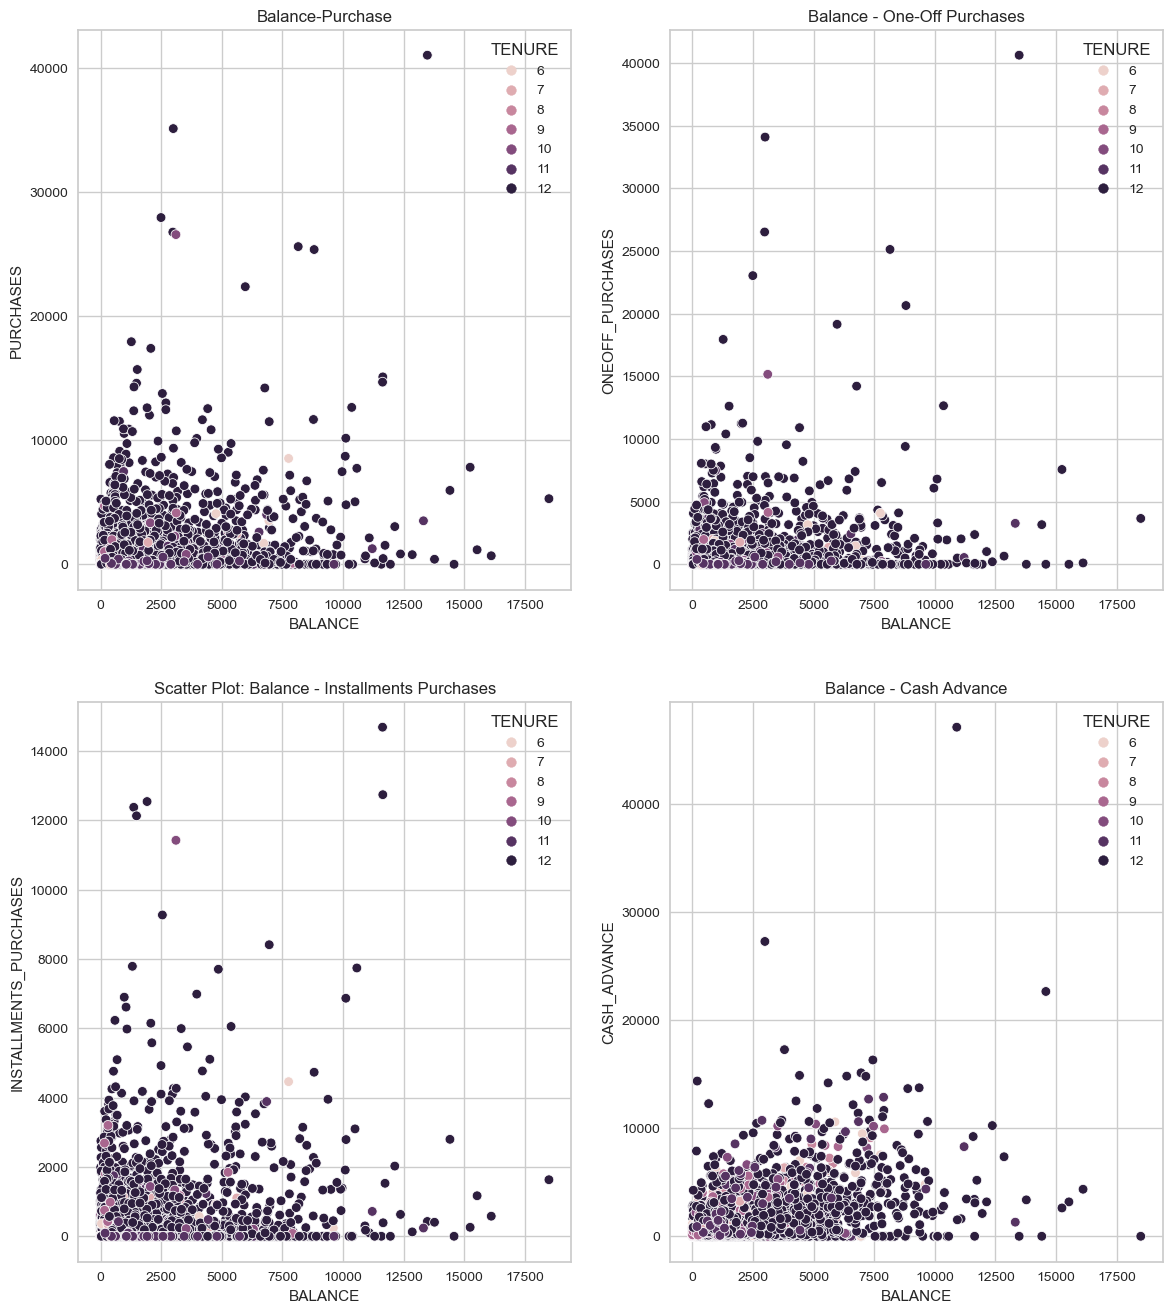

In [8]:
# Scatter plot Balance and Purchases
plt.figure(figsize=(14, 16))
plt.subplot(2, 2, 1)
sns.scatterplot(data=df, x='BALANCE', y='PURCHASES', hue='TENURE')
plt.title('Balance-Purchase')

# Scatter plot Balance and One-Off Purchases
plt.subplot(2, 2, 2)
sns.scatterplot(data=df, x='BALANCE', y='ONEOFF_PURCHASES', hue='TENURE')
plt.title('Balance - One-Off Purchases')

# Scatter plot Balance and Installments Purchases
plt.subplot(2, 2, 3)
sns.scatterplot(data=df, x='BALANCE', y='INSTALLMENTS_PURCHASES', hue='TENURE')
plt.title('Scatter Plot: Balance - Installments Purchases')

# Scatter plot Balance and Cash Advance
plt.subplot(2, 2, 4)
sns.scatterplot(data=df, x='BALANCE', y='CASH_ADVANCE', hue='TENURE')
plt.title('Balance - Cash Advance')

* We can see that most purchases use 12 month tenure.
* We find no relation between balance vs purchases.

### Tenure vs Purchases

In [9]:
eda2_1 = df[['PURCHASES', 'TENURE']]
eda2_1 = eda2_1.groupby('TENURE').agg(AVG=('PURCHASES', 'mean'), MAX=('PURCHASES', 'max')).reset_index()
eda2_1

TENURE          AVG       MAX
0       6   485.022772   8533.54
1       7   373.738444   2763.84
2       8   459.928687   3950.00
3       9   565.134828   4704.98
4      10   807.588689  26582.34
5      11   549.476734   7479.95
6      12  1086.670543  41050.40

Here we make a new dataframe to help us understand more about relationship between tenure and purchases

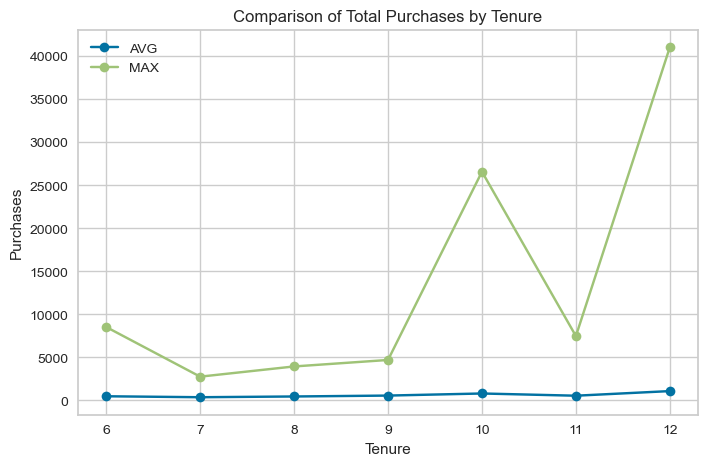

In [10]:
plt.figure(figsize=(8,5))

for column in eda2_1.columns[1:]:
    plt.plot(eda2_1['TENURE'], eda2_1[column], marker='o', label=column)

plt.xlabel('Tenure')
plt.ylabel('Purchases')
plt.title('Comparison of Total Purchases by Tenure')
plt.legend()
plt.show()


* We can see that 12 month tenure, has the highest purchases

In [11]:
eda2_2 = df[['PURCHASES_TRX', 'TENURE']]
eda2_2 = eda2_2.groupby('TENURE').agg(AVG=('PURCHASES_TRX', 'mean'), MAX=('PURCHASES_TRX', 'max')).reset_index()
eda2_2

TENURE        AVG  MAX
0       6   5.425743   72
1       7   5.400000   98
2       8   7.040404   71
3       9   6.402299   45
4      10   9.073770   69
5      11   7.527638   74
6      12  16.392640  347

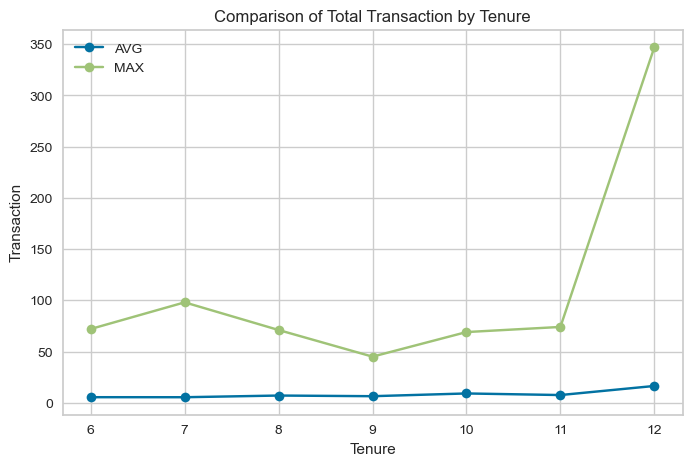

In [12]:
plt.figure(figsize=(8,5))

for column in eda2_2.columns[1:]:
    plt.plot(eda2_2['TENURE'], eda2_2[column], marker='o', label=column)

plt.xlabel('Tenure')
plt.ylabel('Transaction')
plt.title('Comparison of Total Transaction by Tenure')
plt.legend()
plt.show()


* We can see that 12 month tenure, has the highest transaction also. This is make sense, since purchase and transaction are closely related.

### Distribution

We want to check our data distribution

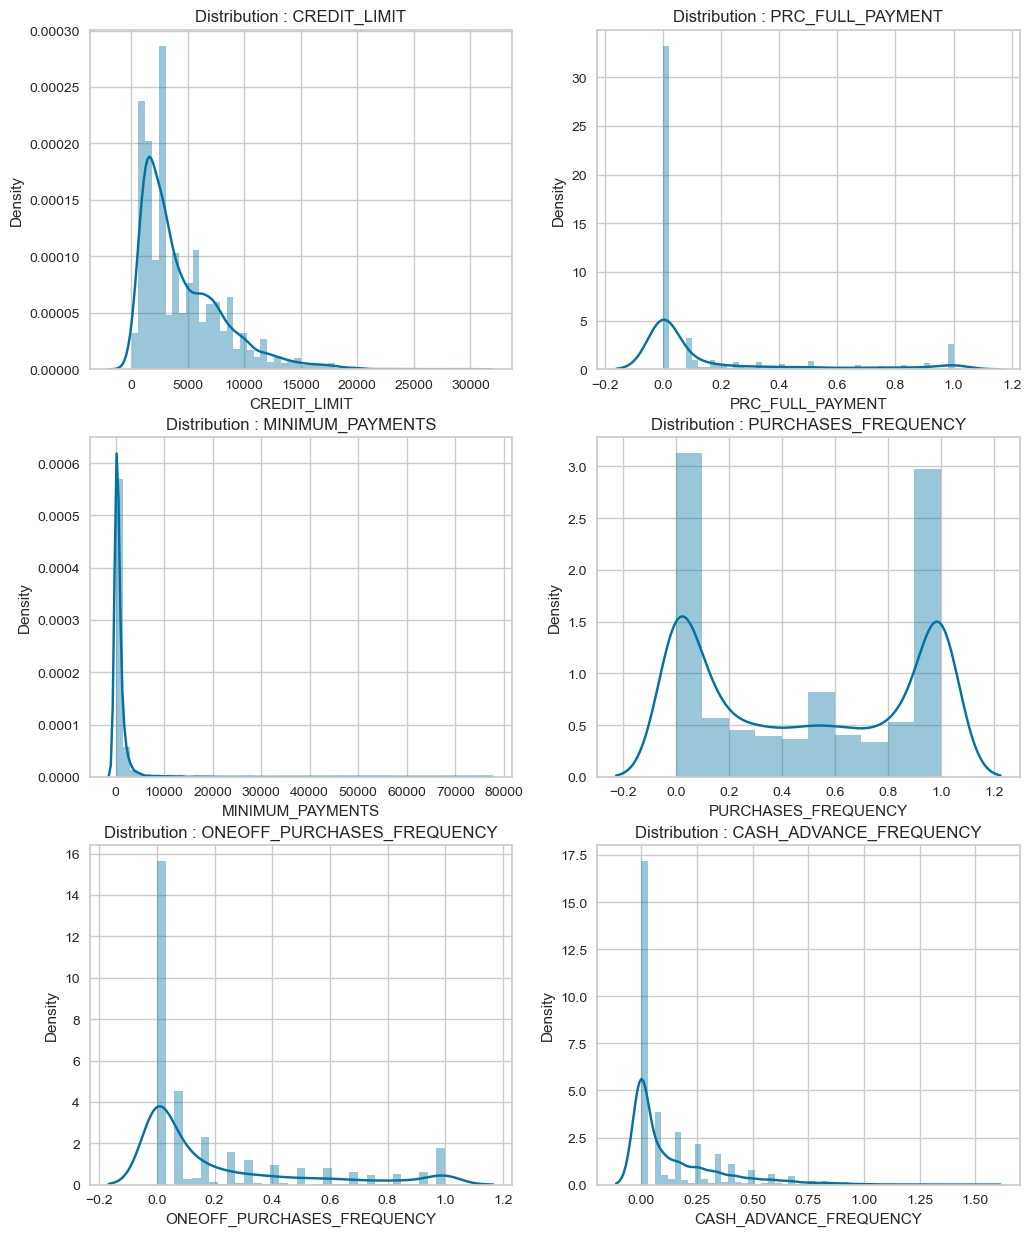

In [13]:
eda_feat = df[['CREDIT_LIMIT', 'PRC_FULL_PAYMENT', 'MINIMUM_PAYMENTS', 'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY', 'CASH_ADVANCE_FREQUENCY']]
hist_eda = eda_feat.columns

# Categorical Features
fig, ax = plt.subplots(nrows = 3,ncols = 2,figsize = (12,15))
for i in range(len(hist_eda)):
    
    plt.subplot(3,2,i+1)
    sns.distplot(df[hist_eda[i]],kde=True);
    title = 'Distribution : ' + hist_eda[i]
    plt.title(title)

del eda_feat, hist_eda

Here, we see most our feature are skewed and some have an extreme skewed.

### Check Correlation

We want to look more about correlation in our data, this will also needed when we check multicolinearity.

In [14]:
# We want to drop feature we do not need
non_categorical_data = df.drop(['CUST_ID'], axis=1)

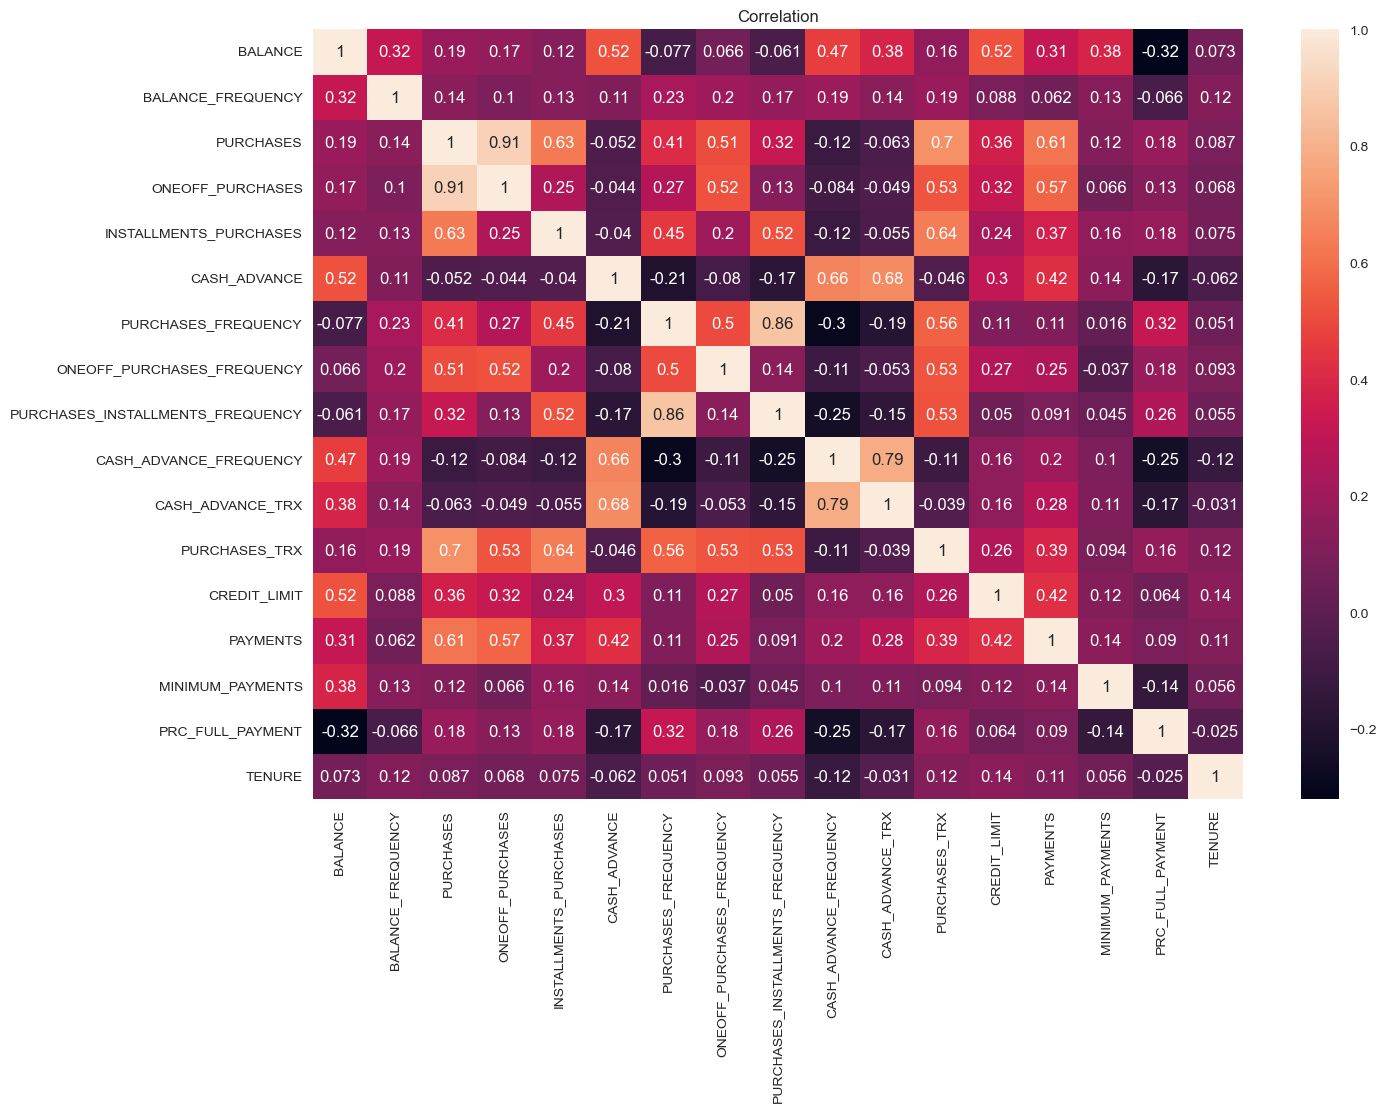

In [15]:
plt.figure(figsize=(15,10))
sns.heatmap(non_categorical_data.corr(),annot=True)
plt.title("Correlation")
plt.show()

Based on the correlation matrix analysis, apparently PURCHASES needs some connections with other variables, such as ONE-OFF PURCHASES AND INSTALLMENTS_PURCHASES with results strong correlations. Some of variables have either weak or no correlations.

## Data Preprocessing

On this steps we want to prepare our data to fit in with our selected model.

### Handling Missing Value
We use KNN imputer, Each sample’s missing values are imputed using the mean value from n_neighbors nearest neighbors found in the training set. It can be less prone to bias than other methods of imputation, as it uses the nearest observations to fill in missing values.

In [16]:
imputer = KNNImputer()
imp_data = pd.DataFrame(imputer.fit_transform(non_categorical_data), columns=non_categorical_data.columns)
imp_data.isna().sum()

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

Now we don't have any missing values.

### Feature Scaling

We use QuantileTransformer which is a method that can be used to transform the features of a dataset to a standard uniform or a normal distribution. This can be useful in clustering algorithms such as K-Means, where the cluster assignments are sensitive to the scale of the features.

In [17]:
scaler = QuantileTransformer()

X = pd.DataFrame(scaler.fit_transform(imp_data), columns=imp_data.columns)
X.head()

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0  0.028168           0.019019   0.253253          0.499499   
1  0.000000           0.000000   0.376379          0.604604   
2  0.470479           0.243744   0.360952          0.592222   
3  0.329907           0.079079   0.757844          0.852864   
4  0.394630           1.000000   0.618619          0.754746   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                     0.0           0.0              0.31982   
1                     0.0           0.0              0.31982   
2                     0.0           0.0              0.31982   
3                     0.0           0.0              0.31982   
4                     0.0           0.0              0.31982   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.621622                               0.0   
1                    0.621622                               0.0   
2                    0.621622                               0.0   
3                    0.621622                               0.0   
4                    0.621622                               0.0   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                     0.0               0.0       0.266767      0.010010   
1                     0.0               0.0       0.266767      0.785285   
2                     0.0               0.0       0.462963      0.129129   
3                     0.0               0.0       0.266767      0.129129   
4                     0.0               0.0       0.266767      0.059560   

   PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT    TENURE  
0  0.000000          0.028544               0.0  0.053554  
1  0.000000          0.152297               0.0  0.053554  
2  0.675947          0.944863               0.0  0.053554  
3  0.853812          0.072539               0.0  0.053554  
4  0.131473          0.170216               0.0  0.053554

### Handling Outlier

We want to use LOF to detect our outlier, which a method to identify data points that have a lower density of nearby observations than the surrounding observations. 

In [18]:
#Setting up the model. K is set by passing the n_neighbors parameter with integer. 20 is often considered good already to detect an outlier. By default the distance metric is Euclidean distance.
lof = LocalOutlierFactor(n_neighbors = 20,contamination=.03)
#Training the model, I drop few columns that was not a continuous variable
X['lof'] = lof.fit_predict(X)

In [19]:
outlier_index = X[X['lof']==-1].index

# Drop outlier
X.drop(index=outlier_index, inplace=True)
X.reset_index(inplace=True, drop=True)
X

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0     0.028168           0.019019   0.253253          0.499499   
1     0.000000           0.000000   0.376379          0.604604   
2     0.470479           0.243744   0.360952          0.592222   
3     0.329907           0.079079   0.757844          0.852864   
4     0.394630           1.000000   0.618619          0.754746   
...        ...                ...        ...               ...   
4335  0.991746           1.000000   0.000000          0.000000   
4336  0.545787           1.000000   0.000000          0.000000   
4337  0.624854           1.000000   0.000000          0.000000   
4338  0.553676           1.000000   0.000000          0.000000   
4339  0.861492           1.000000   0.396134          0.621356   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                        0.0      0.000000              0.31982   
1                        0.0      0.000000              0.31982   
2                        0.0      0.000000              0.31982   
3                        0.0      0.000000              0.31982   
4                        0.0      0.000000              0.31982   
...                      ...           ...                  ...   
4335                     0.0      0.943195              0.00000   
4336                     0.0      0.776929              0.00000   
4337                     0.0      0.690261              0.00000   
4338                     0.0      0.786765              0.00000   
4339                     0.0      0.946420              0.31031   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                       0.621622                               0.0   
1                       0.621622                               0.0   
2                       0.621622                               0.0   
3                       0.621622                               0.0   
4                       0.621622                               0.0   
...                          ...                               ...   
4335                    0.000000                               0.0   
4336                    0.000000                               0.0   
4337                    0.000000                               0.0   
4338                    0.000000                               0.0   
4339                    0.607608                               0.0   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                    0.00000          0.000000       0.266767      0.010010   
1                    0.00000          0.000000       0.266767      0.785285   
2                    0.00000          0.000000       0.462963      0.129129   
3                    0.00000          0.000000       0.266767      0.129129   
4                    0.00000          0.000000       0.266767      0.059560   
...                      ...               ...            ...           ...   
4335                 0.93994          0.886386       0.000000      0.953954   
4336                 0.93994          0.964464       0.000000      0.165165   
4337                 0.93994          0.915415       0.000000      0.207207   
4338                 0.93994          0.901401       0.000000      0.307808   
4339                 0.93994          0.850851       0.266767      0.931431   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT    TENURE  lof  
0     0.000000          0.028544               0.0  0.053554    1  
1     0.000000          0.152297               0.0  0.053554    1  
2     0.675947          0.944863               0.0  0.053554    1  
3     0.853812          0.072539               0.0  0.053554    1  
4     0.131473          0.170216               0.0  0.053554    1  
...        ...               ...               ...       ...  ...  
4335  0.811635          0.925911               0.0  0.133634    1  
4336  0.183182          0.489299               0.0  0.133634    1  
4337  0

Here we do trimming on our outlier using lof.

In [20]:
X = X.drop(['lof'], axis=1)

In [21]:
imp_data_x = imp_data[imp_data.index.isin(X.index)]
len(imp_data_x)

4340

here we want to match our index from unhandled dataframe, we did this to help us in model evaluation step.

### Multicollinearity

We want to check multicollinearity because some correlated features can lead to over-representation of certain clusters and can affect the overall performance of the algorithm.

In [22]:
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [23]:
calc_vif(X)

variables         VIF
0                            BALANCE   40.115824
1                  BALANCE_FREQUENCY    8.944273
2                          PURCHASES   72.834363
3                   ONEOFF_PURCHASES   98.366896
4             INSTALLMENTS_PURCHASES   53.653591
5                       CASH_ADVANCE   49.189426
6                PURCHASES_FREQUENCY   50.748748
7         ONEOFF_PURCHASES_FREQUENCY   81.564402
8   PURCHASES_INSTALLMENTS_FREQUENCY   71.517853
9             CASH_ADVANCE_FREQUENCY  134.549764
10                  CASH_ADVANCE_TRX  161.646388
11                     PURCHASES_TRX   59.969178
12                      CREDIT_LIMIT    5.845907
13                          PAYMENTS    8.803013
14                  MINIMUM_PAYMENTS   26.862744
15                  PRC_FULL_PAYMENT    2.520932
16                            TENURE    6.709447

We have some variables with high VIF. We will use PCA to reduce the dimensionality of the dataset by combining the correlated features into a single principal component. 

## PCA

We use Dimensionality reduction to transform data from a high-dimensional space into a low-dimensional space. This aims to create less multicollinearity, rather than dropping the variables without considering its importance.

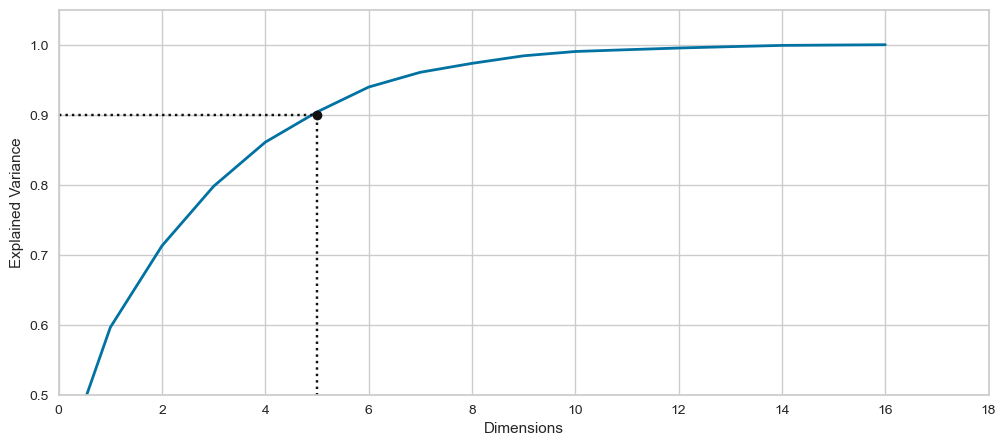

In [24]:
# Fitting the scaled data with PCA 95%
pca = PCA(random_state=20)
pca.fit(X)
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.90)

# Plotting PCA
plt.figure(figsize=(12,5))
plt.plot(cumsum, linewidth=2)
plt.axis([0, 18, 0.5, 1.05])
plt.xlabel("Dimensions")
plt.ylabel("Explained Variance")
plt.plot([d, d], [0, 0.90], "k:")
plt.plot([0, d], [0.90, 0.90], "k:")
plt.plot(d, 0.90, "ko")
plt.grid(True)
plt.show()

Here we want to see the best components for our case, we want to use 95% of overall data and the dimension will be reduce into 5 from 18 in total. But, is it good enough to be the principal components?. Below is the graph which shows the number of principal components we actually need.

Here we make a scree plot, which is a graphical representation of the eigenvalues of the principal components in a PCA (Principal Component Analysis) analysis. It is used to determine the number of principal components to retain in the analysis.

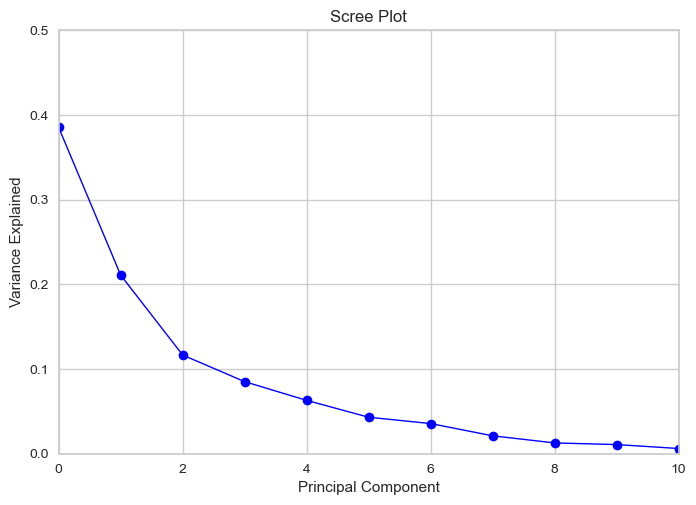

In [25]:
PC_values = np.arange(pca.n_components_)
plt.plot(PC_values, pca.explained_variance_ratio_, 'o-', linewidth=1, color='blue')
plt.axis([0, 10, 0, 0.5])
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()

So we decided to use n_components=2

Number of components that we need are just 2 components based on the significant change. And after component 2, there is only a slight change so component 3 and the rest are not included. This is called as Elbow Method. This means the variable we need to create a cluster is just 2-dimensional model.

Also, after trying some possibility of n_components we saw that 2 dimension is better than the rest.

In [26]:
pca = PCA(n_components=2, random_state=20)
X_reduced = pca.fit_transform(X)

<AxesSubplot:>

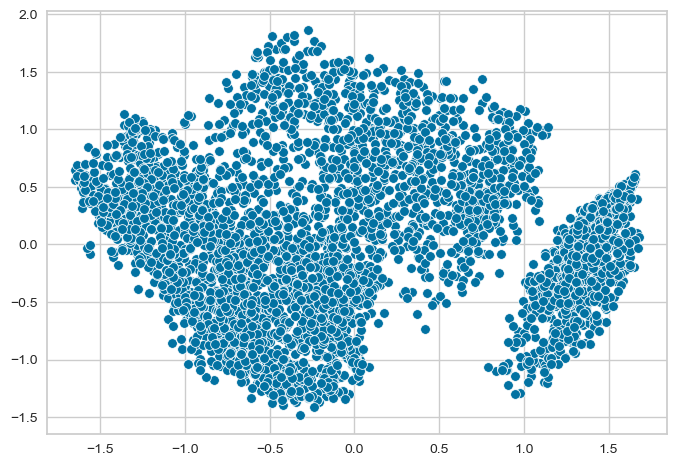

In [27]:
sns.scatterplot(x=X_reduced[:,0],y=X_reduced[:,1],palette="tab10")

Here we see our data after pca with 2 dimension

## Model Definition

Now we want to define our model, which is K-means to cluster our problems

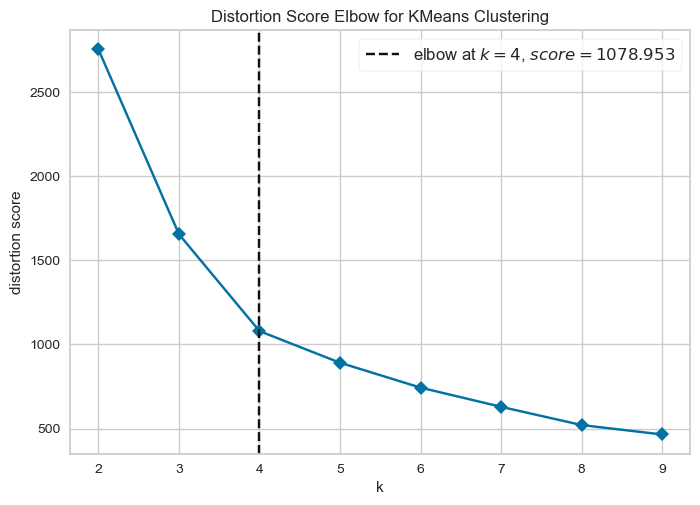

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [28]:
model_test = KMeans(random_state=20, max_iter=500)
distortion_visualizer = KElbowVisualizer(model_test, k=(2,10), timings=False)

distortion_visualizer.fit(X_reduced)       
distortion_visualizer.show() 

Before train our model, we want to choose optimal K for our model. In this case, we opt to use n_cluster=4 because using the graph above, we know that 4 clusters is what we might need.

But, we may want to check if our K value is not 4, which we will do later on. This may helps us to acquire the optimal cluster.

## Model Training

Now after decide our n_cluster we go ahead to train and predict with our model.

In [29]:
# --- Implementing K-Means ---
kmeans = KMeans(n_clusters=4, random_state=20, max_iter=500)
kmeans.fit(X_reduced)


KMeans(max_iter=500, n_clusters=4, random_state=20)

In [30]:
y_pred = kmeans.predict(X_reduced)

we assign y_pred as our prediction result.

In [31]:
# Finding cetroids of each clusters
kmeans.cluster_centers_

array([[ 0.15208514,  0.86300428],
       [ 1.24535693, -0.12324307],
       [-0.44212906, -0.66979524],
       [-1.03462666,  0.29831091]])

Our centroid is 2 dimensional.

### Inertia

Inertia measures how well a dataset was clustered by K-Means. It is calculated by measuring the distance between each data point and its centroid, squaring this distance, and summing these squares across one cluster.

The rules of thumb for good KMEans model is one with low inertia AND a low number of clusters ( K ).

In [32]:
kmeans.inertia_

1078.9601482201685

We have inertia value of 1078.96 which is the lowest we could get, after trying some combinations already.

## Model Evaluation

Now we want to evaluate our model with some metrics to make sure our prediction is good enough.

In [33]:
# Calculate the score
score_kmeans = silhouette_score(X_reduced, kmeans.labels_, metric='euclidean')
print('Silhouette Score From Our Predicted Model: ', score_kmeans)

Silhouette Score From Our Predicted Model:  0.47865904874357723


First we calculate Silhouette Score, where the higher silhouette score, the better the model with the corresponding number of clusters. Later we will try to compare this result.

In [34]:
# Compare silhouette score with different clusters value.
def plot_silhouette(model,range_n_clusters,X,model_name):
    for n_clusters in range_n_clusters:
        # Create a subplot with 1 row and 2 columns
        fig, (ax1, ax2) = plt.subplots(1, 2)
        fig.set_size_inches(18, 7)

        # The 1st subplot is the silhouette plot
        # The silhouette coefficient can range from -1, 1 but in this example all
        # lie within [-0.1, 1]
        ax1.set_xlim([-0.1, 1])
        # The (n_clusters+1)*10 is for inserting blank space between silhouette
        # plots of individual clusters, to demarcate them clearly.
        ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

        clusterer = model(n_clusters=n_clusters)
        cluster_labels = clusterer.fit_predict(X)

        # The silhouette_score gives the average value for all the samples.
        # This gives a perspective into the density and separation of the formed
        # clusters
        silhouette_avg = silhouette_score(X, cluster_labels)
        print("For n_clusters =", n_clusters,
              "The average silhouette_score is :", silhouette_avg)

        # Compute the silhouette scores for each sample
        sample_silhouette_values = silhouette_samples(X, cluster_labels)

        y_lower = 10
        for i in range(n_clusters):
            # Aggregate the silhouette scores for samples belonging to
            # cluster i, and sort them
            ith_cluster_silhouette_values = \
                sample_silhouette_values[cluster_labels == i]

            ith_cluster_silhouette_values.sort()

            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / n_clusters)
            ax1.fill_betweenx(np.arange(y_lower, y_upper),
                              0, ith_cluster_silhouette_values,
                              facecolor=color, edgecolor=color, alpha=0.7)

            # Label the silhouette plots with their cluster numbers at the middle
            ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

            # Compute the new y_lower for next plot
            y_lower = y_upper + 10  # 10 for the 0 samples

        ax1.set_title("The silhouette plot for the various clusters.")
        ax1.set_xlabel("The silhouette coefficient values")
        ax1.set_ylabel("Cluster label")

        # The vertical line for average silhouette score of all the values
        ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

        ax1.set_yticks([])  # Clear the yaxis labels / ticks
        ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

        # 2nd Plot showing the actual clusters formed
        colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
        ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                    c=colors, edgecolor='k')


        ax2.set_title("The visualization of the clustered data.")
        ax2.set_xlabel("Feature space for the 1st feature")
        ax2.set_ylabel("Feature space for the 2nd feature")

        plt.suptitle((f"Silhouette analysis for {model_name} clustering on sample data "
                      "with n_clusters = %d" % n_clusters),
                     fontsize=14, fontweight='bold')

In [35]:
# Make simulation to evaluate our model
K=[2,3,4,5,6,7,8]
inertia=[KMeans(n_clusters=i, random_state=20, max_iter=500).fit(X_reduced).inertia_ for i in K]

For n_clusters = 2 The average silhouette_score is : 0.46719612717849923
For n_clusters = 3 The average silhouette_score is : 0.46101050672749005
For n_clusters = 4 The average silhouette_score is : 0.4787002138059362
For n_clusters = 5 The average silhouette_score is : 0.4565002711566195
For n_clusters = 6 The average silhouette_score is : 0.4322956736264884
For n_clusters = 7 The average silhouette_score is : 0.42944350905762046
For n_clusters = 8 The average silhouette_score is : 0.4117411918943767


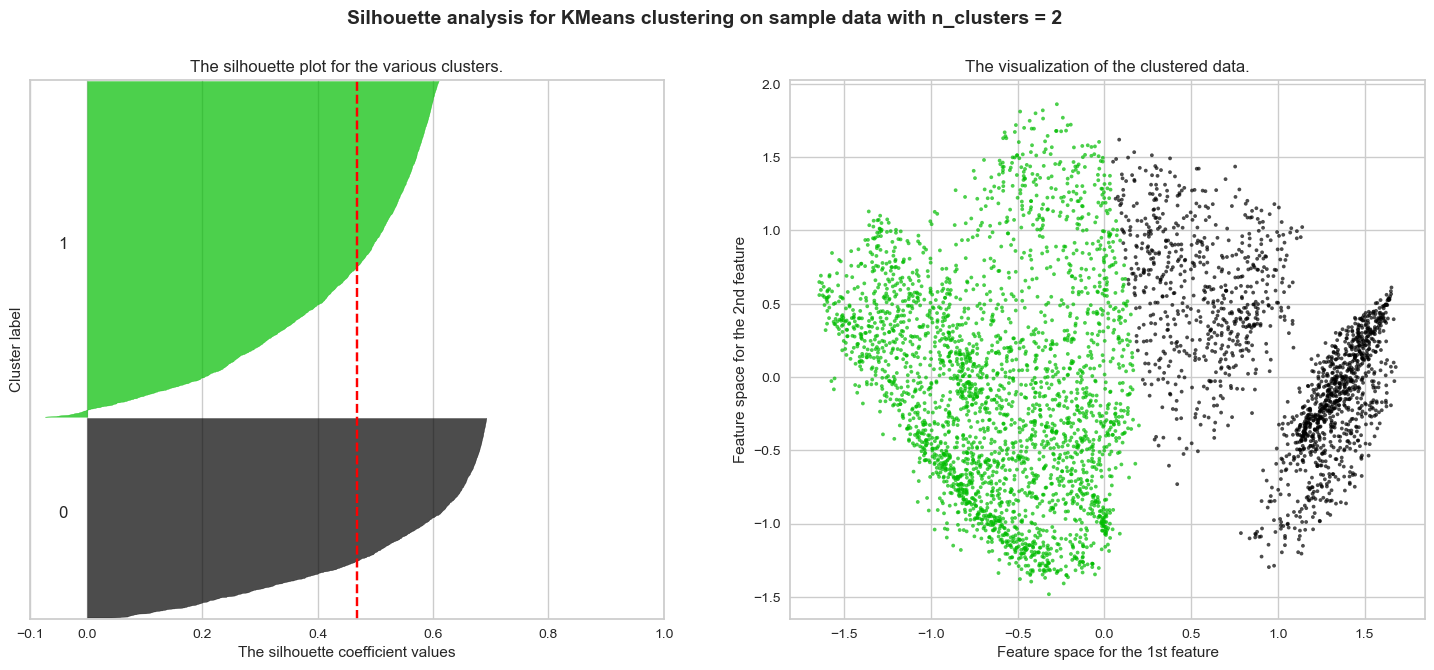

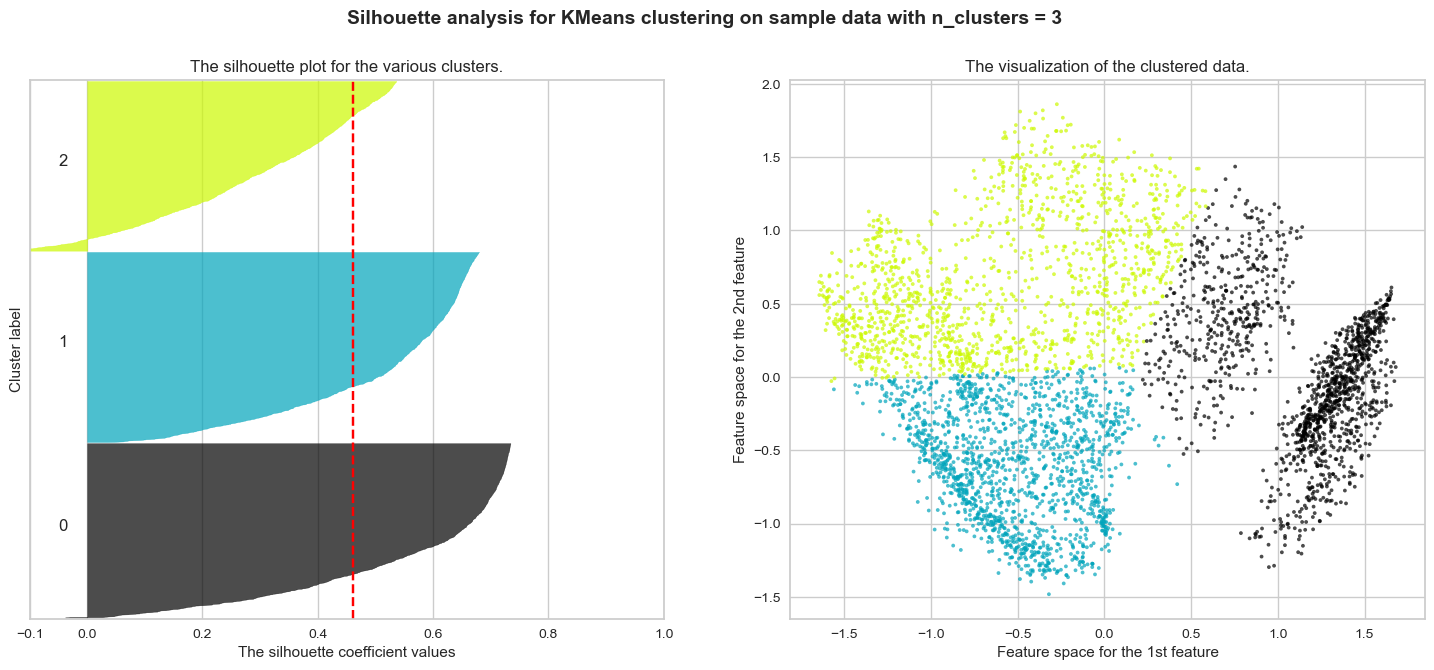

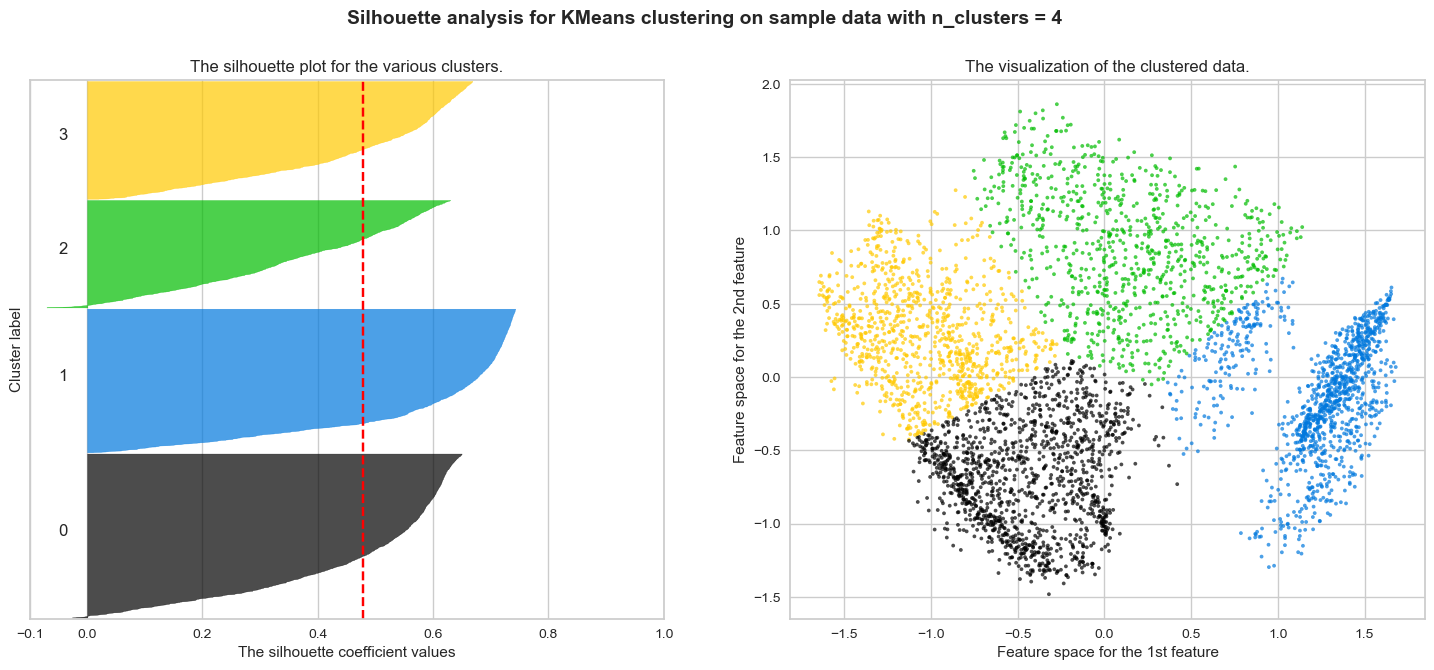

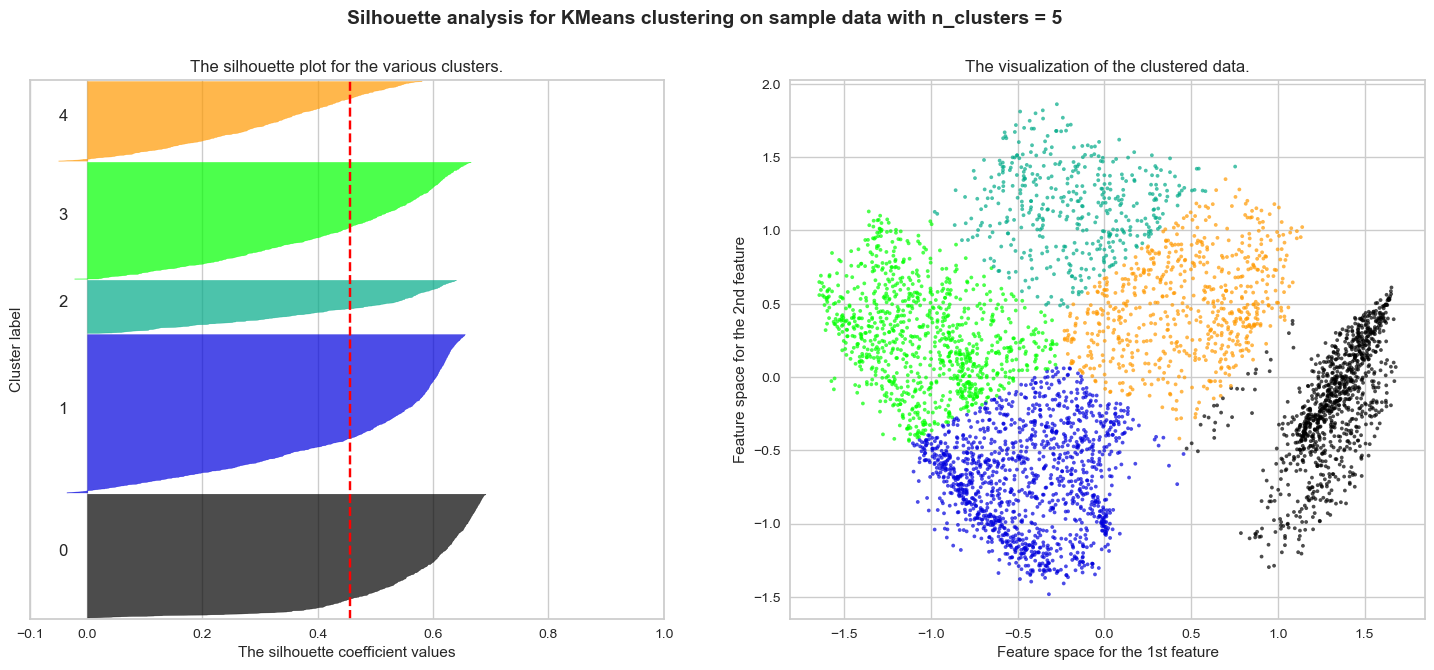

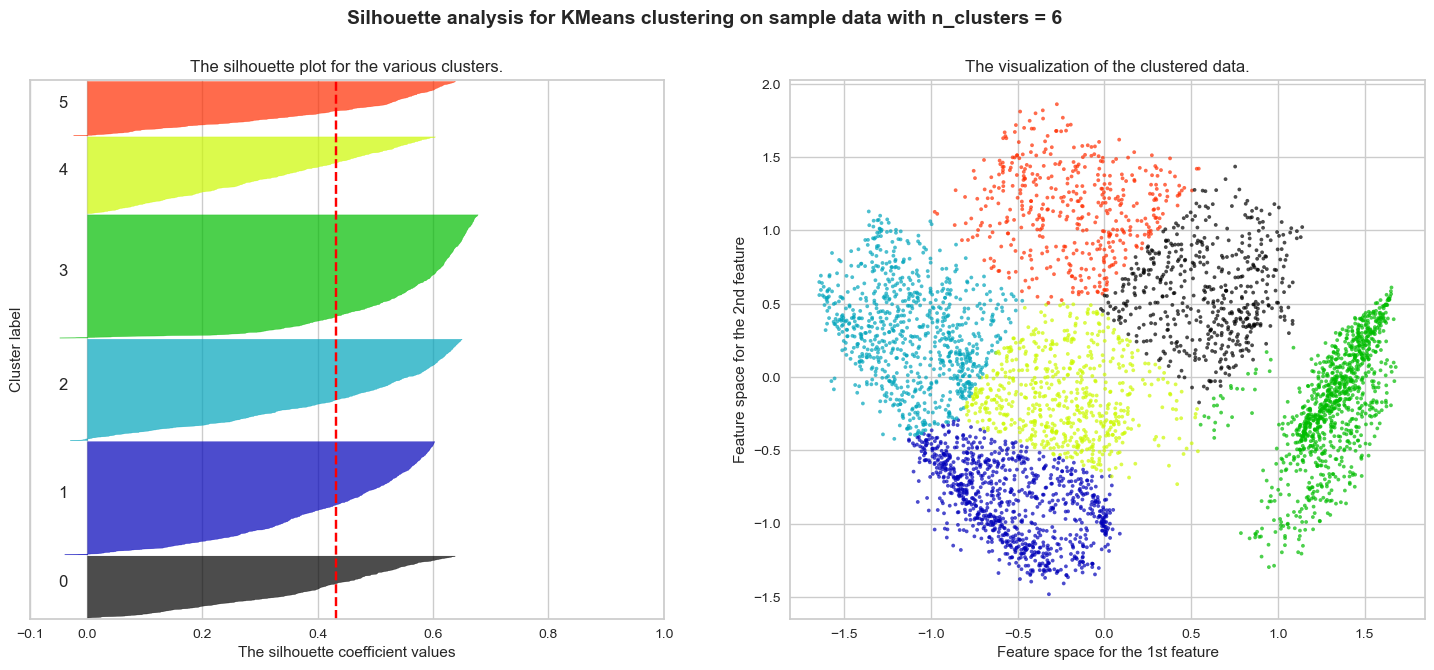

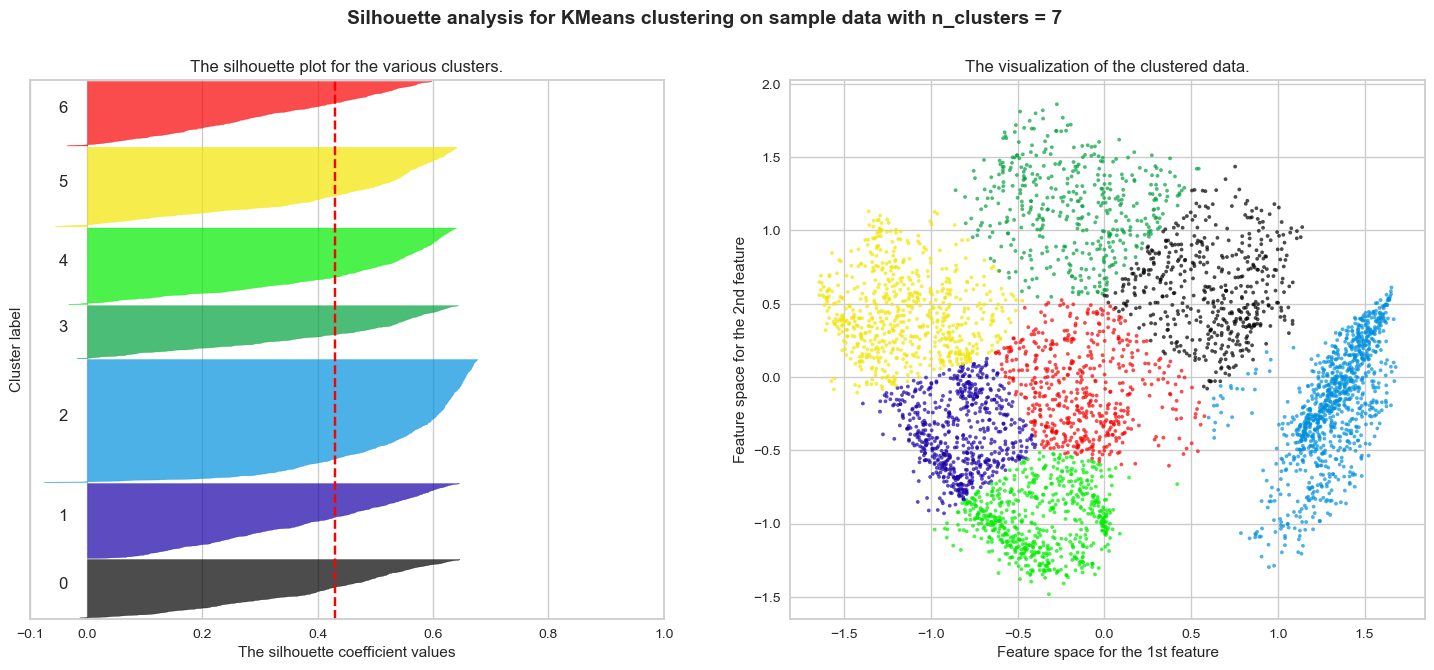

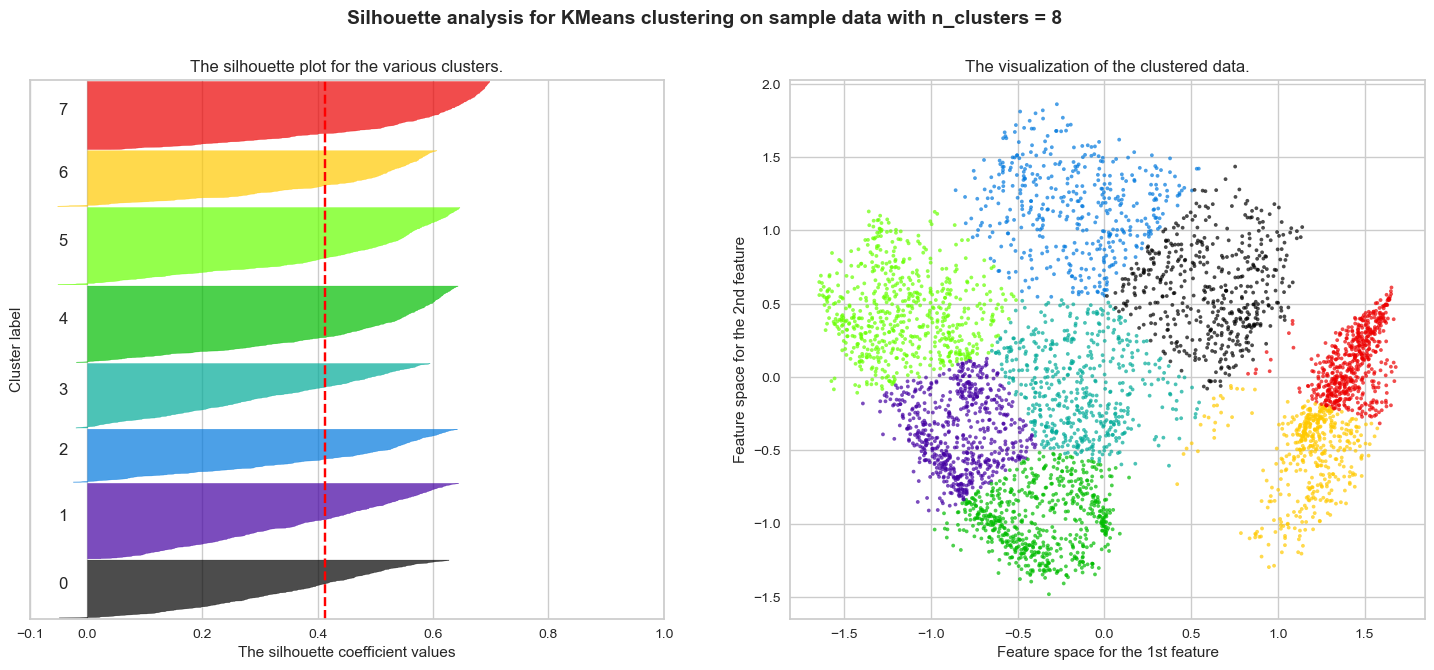

In [36]:
plot_silhouette(KMeans,K,X_reduced,'KMeans')

* Here we know that our model with n_cluster=4 has the highest average silhouette score.
* Also, compared to another cluster, our model has the best visualization which has a decent cluster proportion.

Next, we want to take a closer look at our chosen cluster.

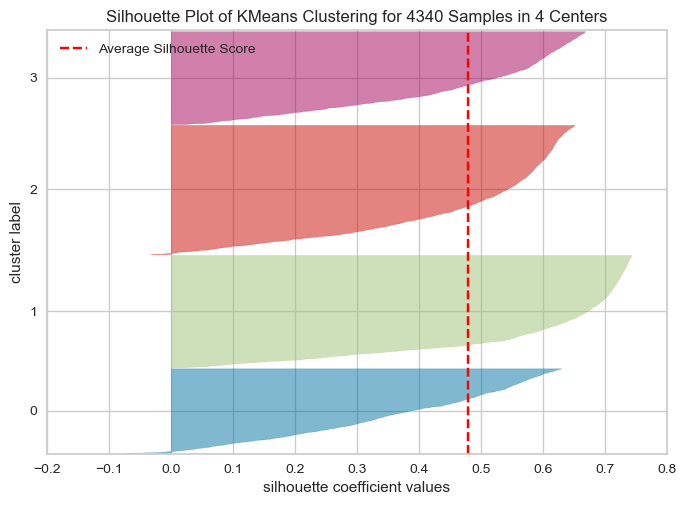

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 4340 Samples in 4 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [37]:
# Focus on n_cluster=4
visualizer = SilhouetteVisualizer(kmeans, colors='yellowbrick')
visualizer.fit(X_reduced, axis=1)
visualizer.show()

From the silhouette clusters, the silhouette value of each cluster is above the average, indicating all clusters are optimal. 

We also want to calculate calinski_harabasz_score, which is a ratio of the sum of between-clusters dispersion and of inter-cluster dispersion for all clusters, the higher the score, the better the performances.

In [38]:
# Evaluate Clustering Quality Function
def evaluate_clustering(X, y):
    s_score = round(silhouette_score(X, y), 3)
    ch_index = round(calinski_harabasz_score(X, y), 3)
    print('Evaluate Clustering Quality')
    print('*' * 34)
    print('Silhouette Score:', s_score)
    print('Calinski Harabasz Index:', ch_index)
    return s_score, ch_index

evaluate_clustering(X_reduced, y_pred)

Evaluate Clustering Quality
**********************************
Silhouette Score: 0.479
Calinski Harabasz Index: 5990.154


(0.479, 5990.154)

Here is our calculation result, we have a quite good Silhouette Score. Also a high Calinski Harabasz Index means that the data points within a cluster are more similar to each other than they are to data points in other clusters.

## Segmentation Result

After we satisfied with our model, we want to give a segmentation result from our clustering models.

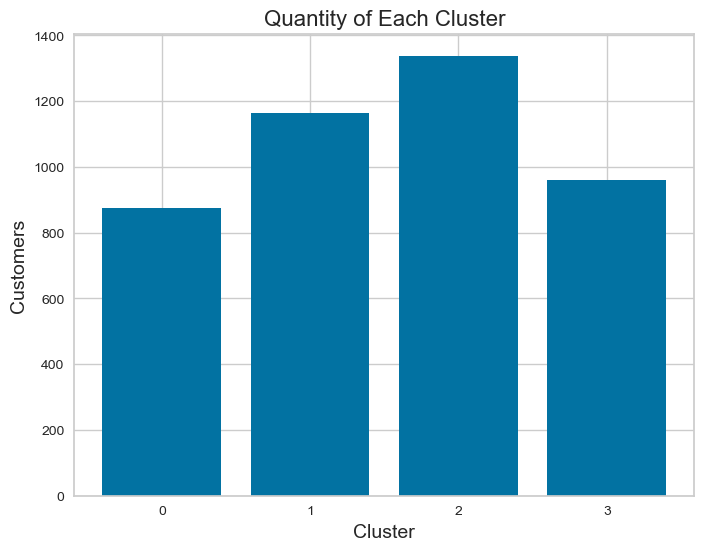

Cluster 0: 876
Cluster 1: 1165
Cluster 2: 1338
Cluster 3: 961


In [39]:
labels, counts = np.unique(y_pred, return_counts = True)

plt.figure(figsize = (8,6))
plt.title('Quantity of Each Cluster', size = 16)
plt.bar(labels, counts)
plt.xlabel('Cluster', size = 14)
plt.ylabel('Customers', size = 14)
plt.xticks(labels)
plt.show()

for i in zip(labels, counts):
    print('Cluster %s: %s' %(i[0],i[1]))

Here we can see our data has been segmented into 4 clusters with cluster 2 have the highest amount of customers

Now we will show our cluster distribution.

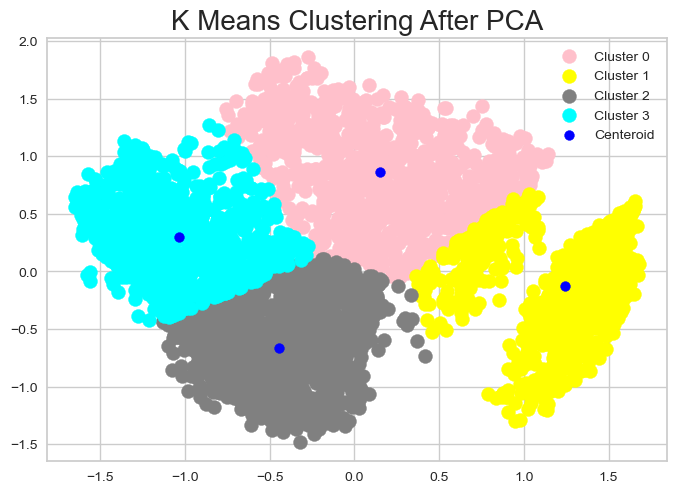

In [40]:
plt.scatter(X_reduced[y_pred == 0, 0], X_reduced[y_pred == 0, 1], s = 100, c = 'pink', label = 'Cluster 0')
plt.scatter(X_reduced[y_pred == 1, 0], X_reduced[y_pred == 1, 1], s = 100, c = 'yellow', label = 'Cluster 1')
plt.scatter(X_reduced[y_pred == 2, 0], X_reduced[y_pred == 2, 1], s = 100, c = 'grey', label = 'Cluster 2')
plt.scatter(X_reduced[y_pred == 3, 0], X_reduced[y_pred == 3, 1], s = 100, c = 'cyan', label = 'Cluster 3')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:, 1], s = 50, c = 'blue' , label = 'Centeroid')

plt.style.use('fivethirtyeight')
plt.title('K Means Clustering After PCA', fontsize = 20)
plt.legend()
plt.grid(True)
plt.show()

We can see our clusters here, because our data is 2 dimensional we can plot this cluster easily.

Now we want to see more about our clusters, next we will use violin plot.

In [41]:
# Merge our data with predicted cluster.
final_data = imp_data_x.copy()
final_data['Cluster'] = y_pred
final_data.head()

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0    3.833185              0.125      45.00             45.00   
1    0.000000              0.000     176.03            176.03   
2  757.964752              0.875     157.40            157.40   
3  264.566591              0.375    1150.00           1150.00   
4  440.613643              1.000     600.00            600.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                     0.0           0.0                0.125   
1                     0.0           0.0                0.125   
2                     0.0           0.0                0.125   
3                     0.0           0.0                0.125   
4                     0.0           0.0                0.125   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                       0.125                               0.0   
1                       0.125                               0.0   
2                       0.125                               0.0   
3                       0.125                               0.0   
4                       0.125                               0.0   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                     0.0               0.0            1.0         500.0   
1                     0.0               0.0            1.0        7000.0   
2                     0.0               0.0            6.0        1200.0   
3                     0.0               0.0            1.0        1200.0   
4                     0.0               0.0            1.0        1000.0   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  Cluster  
0     0.000000         50.895427               0.0     8.0        2  
1     0.000000        131.012160               0.0     8.0        2  
2  1494.480376       2638.598410               0.0     8.0        2  
3  3029.380326         85.428885               0.0     8.0        2  
4   215.316424        137.846006               0.0     8.0        2

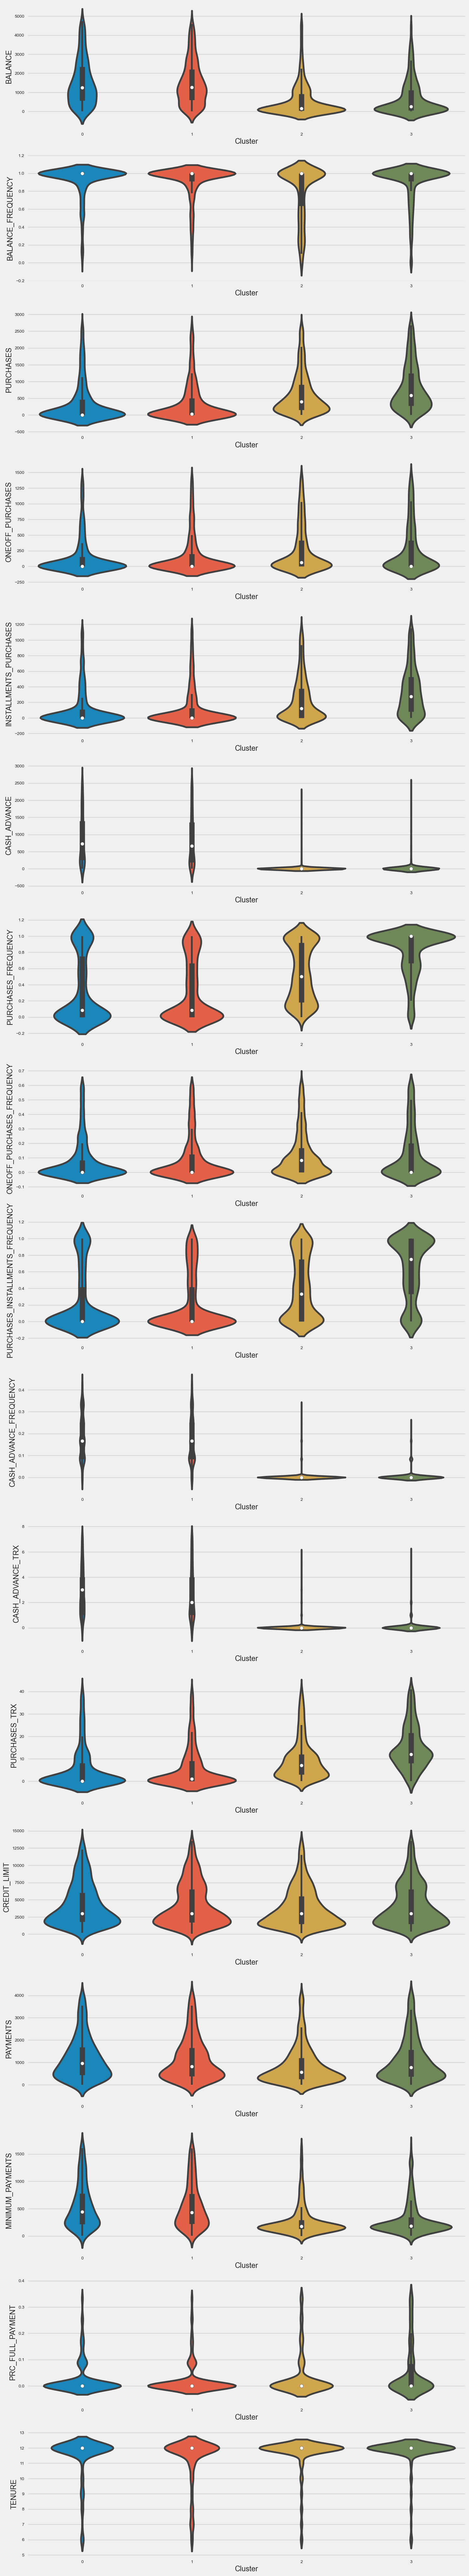

In [42]:
fig, axs = plt.subplots(nrows = 17, ncols = 1, figsize = (16,100))
for i in range(17):
    q1, q3 = np.quantile(final_data.iloc[:,i], [0.25, 0.75])
    sns.violinplot(data = final_data[['Cluster', final_data.columns[i]]].loc[final_data[final_data.columns[i]] <= (q3 + 1.5*(q3-q1))], x = 'Cluster', y = final_data.columns[i], ax = axs[i])

plt.show()

From this plot we can see some behaviours of our customers, but for more detailed view we will continue below

## EDA After Clustering

Here we will make and overall view from our clusters.

In [43]:
final_data_eda = final_data.drop(['Cluster'],axis=1)

In [44]:
# Add Prediction to Data Frame 
final_data_eda['cluster_result'] = y_pred
final_data_eda['cluster_result'] = 'Cluster '+final_data_eda['cluster_result'].astype(str)

# Overall Mean
df_profile_overall = pd.DataFrame()
df_profile_overall['Overall Avg'] = final_data_eda.describe().loc[['mean']].T

# Mean of Each Clusters
df_cluster_summary = final_data_eda.groupby('cluster_result').describe().T.reset_index().rename(columns={'level_0': 'Column Name', 'level_1': 'Metrics'})
df_cluster_summary = df_cluster_summary[df_cluster_summary['Metrics'] == 'mean'].set_index('Column Name')

# Combine DataFrame
df_profile = df_cluster_summary.join(df_profile_overall).reset_index()
df_profile.style.background_gradient(cmap='GnBu').hide_index()

Based from information from our violin plot, and this dataframe we can say that each cluster has the following characteristics:

1. Cluster 0 (All-Around Card Holders)

    This cluster represents customers which are the active and versatile users of our credit card. They also make a good payment to make sure their balance stays high. They also has a decent amount purchase with our cards and also do many cash advances.

2. Cluster 1 (Cash Advances Card Holders)

    Customer within this cluster are quite simmilar to cluster 0, but the are less active and use their cards more for cash advance.

3. Cluster 2 (Starter Card Holders)

    This cluster have customers which tend to use their card to make purchases only, with less cash advances. Also tend to run out their balance limit.

4. Cluster 3 (Instalment Only Card Holders)

    Customers within this cluster tend to make much purchases with installment, also prefers the longest tenure to pay.

## Overall Anlysis & Conclusion

After analysing our model and its result we can conclude that:
* Before train our model, we want to choose optimal K for our model. In this case, we opt to use n_cluster=4 because using the graph above, we know that 4 clusters is what we might need.
* Our K-Means model with Silhouette Score: 0.479 & Calinski Harabasz Index: 5990.154. We have a quite good Silhouette Score. Also a high Calinski Harabasz Index means that the data points within a cluster are more similar to each other than they are to data points in other clusters.
* Here we know that our model with n_cluster=4 has the highest average silhouette score. Also, compared to another cluster, our model has the best visualization which has a decent cluster proportion.
* We have inertia value of 1078.96 which is the lowest we could get, after trying some combinations already.
* We have some variables with high VIF. We will use PCA to reduce the dimensionality of the dataset by combining the correlated features into a single principal component. 
* For PCA, after trying some possibility of n_components we saw that 2 dimension is better than the rest.
* After train our model, we can say 4 clusters we opt to choose successfully descrive our customer behaviour.
* We segmented our cluster into All-Around Card Holders, Cash Advances Card Holders, Starter Card Holders, Instalment Only Card Holders

From previously done EDA:
* We know that customer choose to do 12 months tenure.
* Also higher transaction and purchases increase as the tenure months goes up.

Further improvements:
* To improve our model, we might need to use another clustering algorithm which robust to outlier since our data have so much outliers
* Our model also has some mis-clustering, to improve this we may need to choose a different distance metrics.

## Model Saving

In [45]:
num_cols = X.columns

In [46]:
with open('model_KMeans.pkl', 'wb') as file_1:
  joblib.dump(kmeans, file_1)

with open('model_scaler.pkl', 'wb') as file_2:
  joblib.dump(scaler, file_2)

with open('pca.pkl', 'wb') as file_3:
  joblib.dump(pca, file_3)

with open('list_num_cols.pkl', 'wb') as file_4:
  joblib.dump(num_cols, file_4)